In [806]:
#Data Science Project
"""
Predict if  a patient will live or die given they have hepatitis

WORKFLOW->
Data prepration
EDA
Feature Selection
Model Building
Interpret Model
"""

'\nPredict if  a patient will live or die given they have hepatitis\n\nWORKFLOW->\nData prepration\nEDA\nFeature Selection\nModel Building\nInterpret Model\n'

In [807]:
#loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [808]:
#load dataset
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\hepatitis.data")
#our data here has no names of column just the values. The columns names are in different file. So just copy the attributes somewhere.

In [809]:
df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


 1. Class: DIE, LIVE
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
     3. SEX: male, female
     4. STEROID: no, yes
     5. ANTIVIRALS: no, yes
     6. FATIGUE: no, yes
     7. MALAISE: no, yes
     8. ANOREXIA: no, yes
     9. LIVER BIG: no, yes
    10. LIVER FIRM: no, yes
    11. SPLEEN PALPABLE: no, yes
    12. SPIDERS: no, yes
    13. ASCITES: no, yes
    14. VARICES: no, yes
    15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
    16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
    17. SGOT: 13, 100, 200, 300, 400, 500, 
    18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
    19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
    20. HISTOLOGY: no, yes

In [810]:
#getting all the attributes names so that we can have columns in our data
col_names=["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"]

In [811]:
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\hepatitis.data",names=col_names)
#now our dataframe is much better

In [812]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [813]:
#making our column names a little more consistent
df.columns

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [814]:
#convert all to lower case
df.columns.str.lower().str.replace(" ","_")  #converted all to lower case and also spaces to underscore

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [815]:
df.columns=df.columns.str.lower().str.replace(" ","_") #now we have clean and organised columns
#replaced original with cleaned

In [816]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [817]:
#checking for data types
print(df.dtypes)

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object


In [818]:
#replace ? with 0

df=df.replace("?",0)
df.head(10) #->protime kuch zyada hi missing hai in initial phases

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,0,0,0,0,0,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,0,0,0,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,0,48,4.4,0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,120,3.9,0,1


In [819]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [820]:
#convert object to integer values
sum(df.dtypes=="object") #tells how many attributes have "object" datatype

15

In [821]:
#selecting only object type columns
df.columns[df.dtypes=="object"]

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [822]:
#convert from one one type to other. these are all objects . convert to int. we got error since some of them are in float type->bilirubin,albumin. so we can not convert all to int. so convert albumin and bilirubin seperately 
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot',  'protime']]=df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 
       'alk_phosphate', 'sgot','protime']].astype(int)

In [823]:
df.dtypes


class               int64
age                 int64
sex                 int64
steroid             int32
antivirals          int64
fatigue             int32
malaise             int32
anorexia            int32
liver_big           int32
liver_firm          int32
spleen_palpable     int32
spiders             int32
ascites             int32
varices             int32
bilirubin          object
alk_phosphate       int32
sgot                int32
albumin            object
protime             int32
histology           int64
dtype: object

In [824]:
#now all to float except bilurubin and albumin
df[['bilirubin','albumin']]=df[['bilirubin','albumin']].astype(float)

print(df.dtypes)

class                int64
age                  int64
sex                  int64
steroid              int32
antivirals           int64
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float64
alk_phosphate        int32
sgot                 int32
albumin            float64
protime              int32
histology            int64
dtype: object



MOST OF THE DATA WERE IN OBJECTS
TWO WERE IN FLOAT TYPE
NOW WE HAVE CONVERTED THEM TO INT 

In [825]:
#count of each row
print(df.count()) #each row has 155 data

print()
print()


print(df.info())

class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
histology          155
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            155 non-null    int64  
 1   age              155 non-null    int64  
 2   sex              155 non-null    int64  
 3   steroid          155 non-null    int32  
 4   antivirals       155 non-null    int64  
 5   fatigue          155 non-null    int32  
 6   malaise          155 non-null    int32  
 7   a

In [826]:
df.shape

(155, 20)

In [827]:
#check for missing values
df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

now there are no missing values

EXPLORATORY DATA ANALYSIS (EDA)
descriptive analytics

In [828]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [829]:
target_label={"Die":1, "Live":2}

In [830]:
"""
#value counts
1->die
2->live
"""
df['class'].value_counts()

class
2    123
1     32
Name: count, dtype: int64

Text(0.5, 0, 'class')

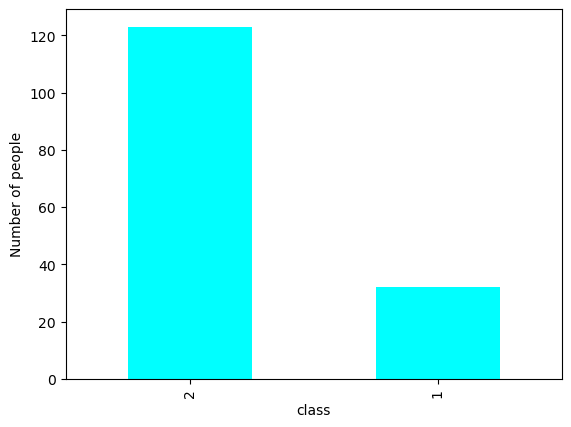

In [831]:
#lets plot this info. plot of die vs live
df['class'].value_counts().plot(kind='bar',color="cyan")
plt.ylabel("Number of people")
plt.xlabel("class")


In [832]:
# how many are males->1 and females->2
df['sex'].unique() #tells all possible unique values

array([2, 1], dtype=int64)

In [833]:
df['sex'].value_counts() #139 males and 16 females

sex
1    139
2     16
Name: count, dtype: int64

<Axes: xlabel='sex'>

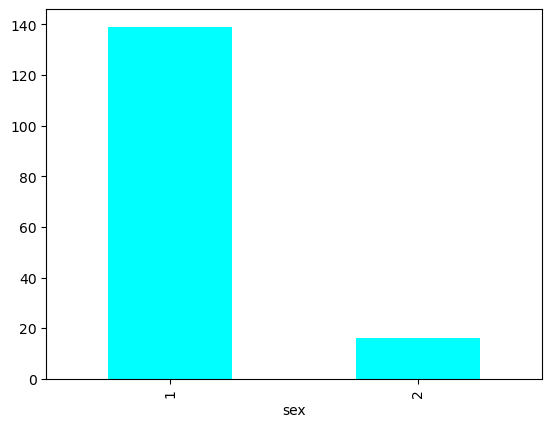

In [834]:
df['sex'].value_counts().plot(kind='bar',color='cyan')

there are more males than females in our data

In [835]:
#lets see age attributes now
#frequency distribution table
print(f"the max age in our data is {df['age'].max()}")
print(f"the min age in our data is {df['age'].min()}")

the max age in our data is 78
the min age in our data is 7


In [836]:
labels=["<10","10-20","20-30","30-40","40-50","50-60","60-70","70-80"]
bins=[0,10,20,30,40,50,60,70,80]

freq_df=df.groupby(pd.cut(df['age'],bins=bins,labels=labels),observed=True).size()


In [837]:
freq_df

age
<10       1
10-20     3
20-30    29
30-40    50
40-50    35
50-60    24
60-70    11
70-80     2
dtype: int64

In [838]:
freq_df=freq_df.reset_index(name='count')

In [839]:
freq_df

,age,count
0,<10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70-80,2


In [840]:
#age group of 30-40 is most affected by hepatitis 
#age with less than 10 are least affected 

<Axes: >

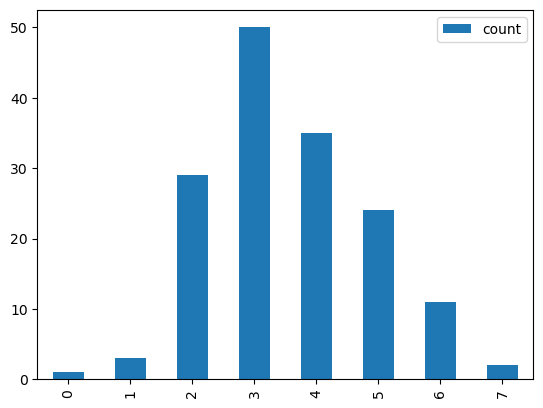

In [841]:
freq_df.plot(kind='bar')

<Axes: >

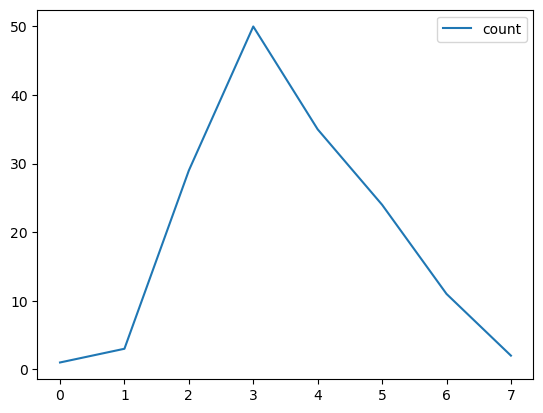

In [842]:
freq_df.plot(kind='line')

Text(0.5, 1.0, 'frequency count of age')

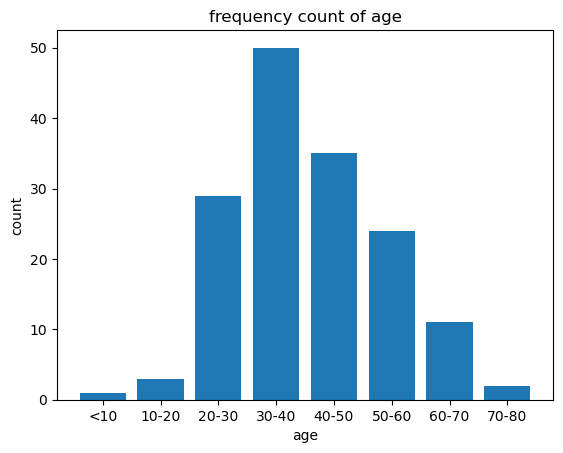

In [843]:
#plot of freq table
plt.bar(freq_df['age'],freq_df['count']) #we gave x parameters and y parameters
plt.xlabel('age')
plt.ylabel('count')
plt.title("frequency count of age")

highest people affected with hepatitis are from 30-40 followed by 40-50 then 20-30
least affected are kids below 10 and people aged 70+

In [844]:
#using a pie chart


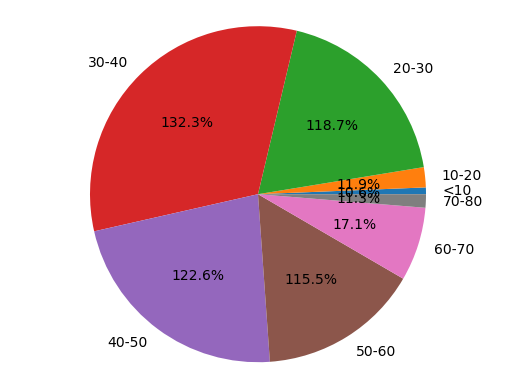

In [845]:
labels=["<10","10-20","20-30","30-40","40-50","50-60","60-70","70-80"]
fig1,ax1=plt.subplots()
ax1.pie(freq_df['count'],labels=labels,autopct='1%.1f%%')
plt.axis('equal')
plt.show()

checking for outliers
univariate analysis
multivariate analysis

methods 

1)boxplots useful for univariate
2)scatter plots useful for multi variate
3)Z-score
4)IQR


<Axes: >

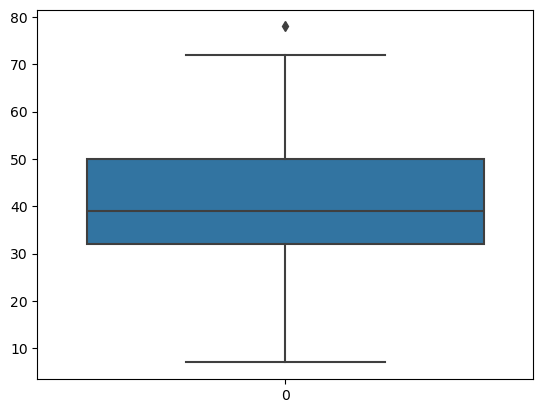

In [846]:
#using boxplot for univariate outlier
import seaborn as sns

sns.boxplot(df['age'])




In [847]:
#our age is mostly of 30-50. near 80 is outlier


[Text(0.5, 1.0, 'Alk_phosphate')]

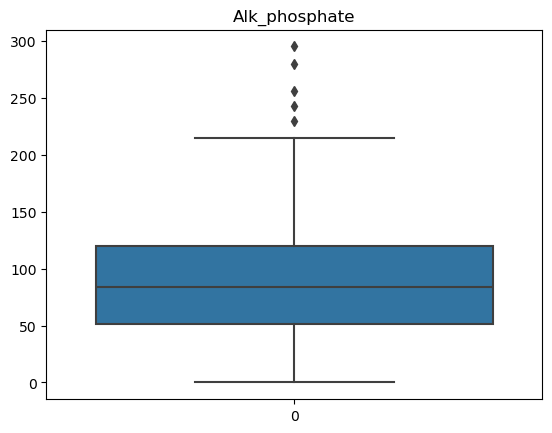

In [848]:

sns.boxplot(df['alk_phosphate']).set(title='Alk_phosphate')

[Text(0.5, 1.0, 'sgot')]

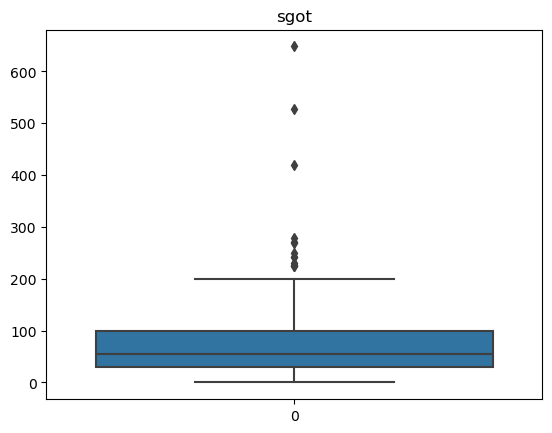

In [849]:
sns.boxplot(df['sgot']).set(title='sgot')

[Text(0.5, 1.0, 'protime')]

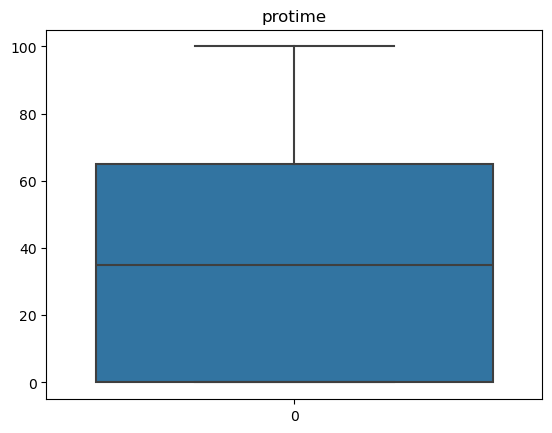

In [850]:
sns.boxplot(df['protime']).set(title='protime')

In [851]:
df[df['age']==78]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1


[Text(0.5, 1.0, 'steroid')]

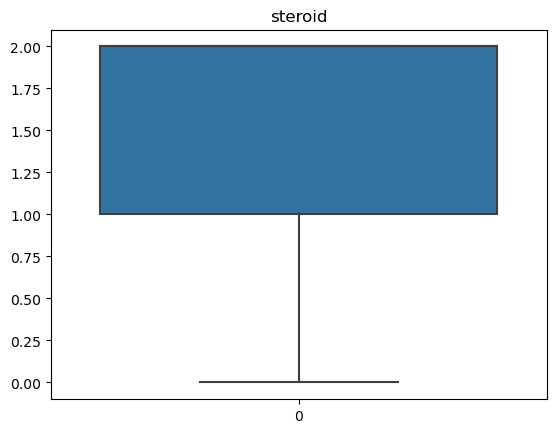

In [852]:
#using boxplot for oulier detection
sns.boxplot(df['steroid']).set(title='steroid') #here no outlier

<Axes: xlabel='age', ylabel='albumin'>

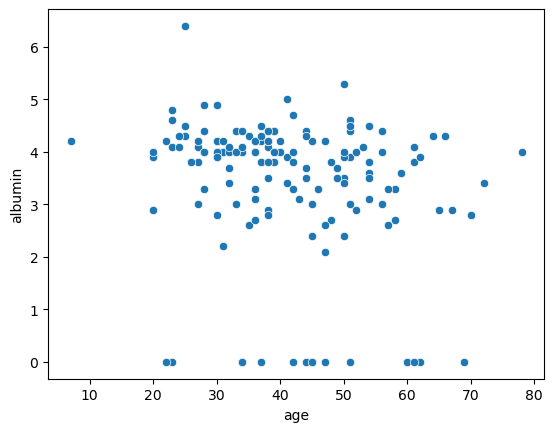

In [853]:
#scatter plot 
sns.scatterplot(x=df['age'],y=df['albumin'])

<Axes: xlabel='albumin', ylabel='age'>

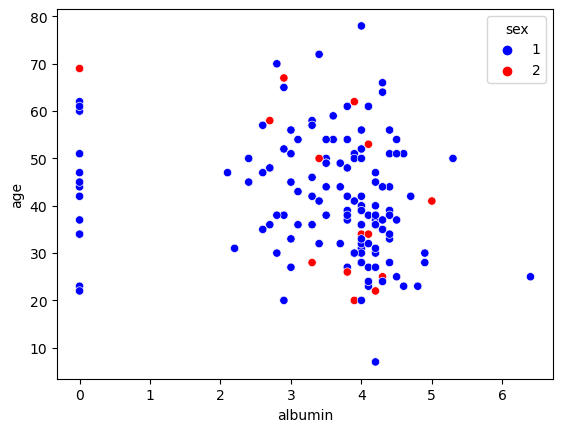

In [854]:
#scatter plot
sns.scatterplot(x=df['albumin'],y=df['age'],hue=df['sex'],palette=['blue','red'],data=df)

In [855]:
#most alubumin is between 2-5 rest are outliers

In [856]:
#method 2 using IQR for outliers

In [857]:
#IQR=Q3(75% of data)-Q1(25%of data)


In [858]:
q1=df.quantile(.25)
q3=df.quantile(.75)
iqr=q3-q1
print(iqr)

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
histology           1.00
dtype: float64


In [859]:
#alk phospahte sgot protime have a lot of outliers

In [860]:
#getting actual data outliers
(df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)) 

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


The data with true are outliers


In [861]:
#solution-> remove or change it 

In [862]:
#removal->
df_no_outlier=df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)] # we used ~ . so jo jo points are in q1-1.5 to q3+1.5 range will not be included. so outliers removed

In [863]:
df_no_outlier

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,0,48,4.4,0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,120,3.9,0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
16,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102,53,4.3,0,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4.0,63,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53,42,4.1,85,2
22,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,20,4.0,100,1
23,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.9,60,63,4.7,47,1


In [864]:
print(df.shape)
print(df_no_outlier.shape)

(155, 20)
(43, 20)


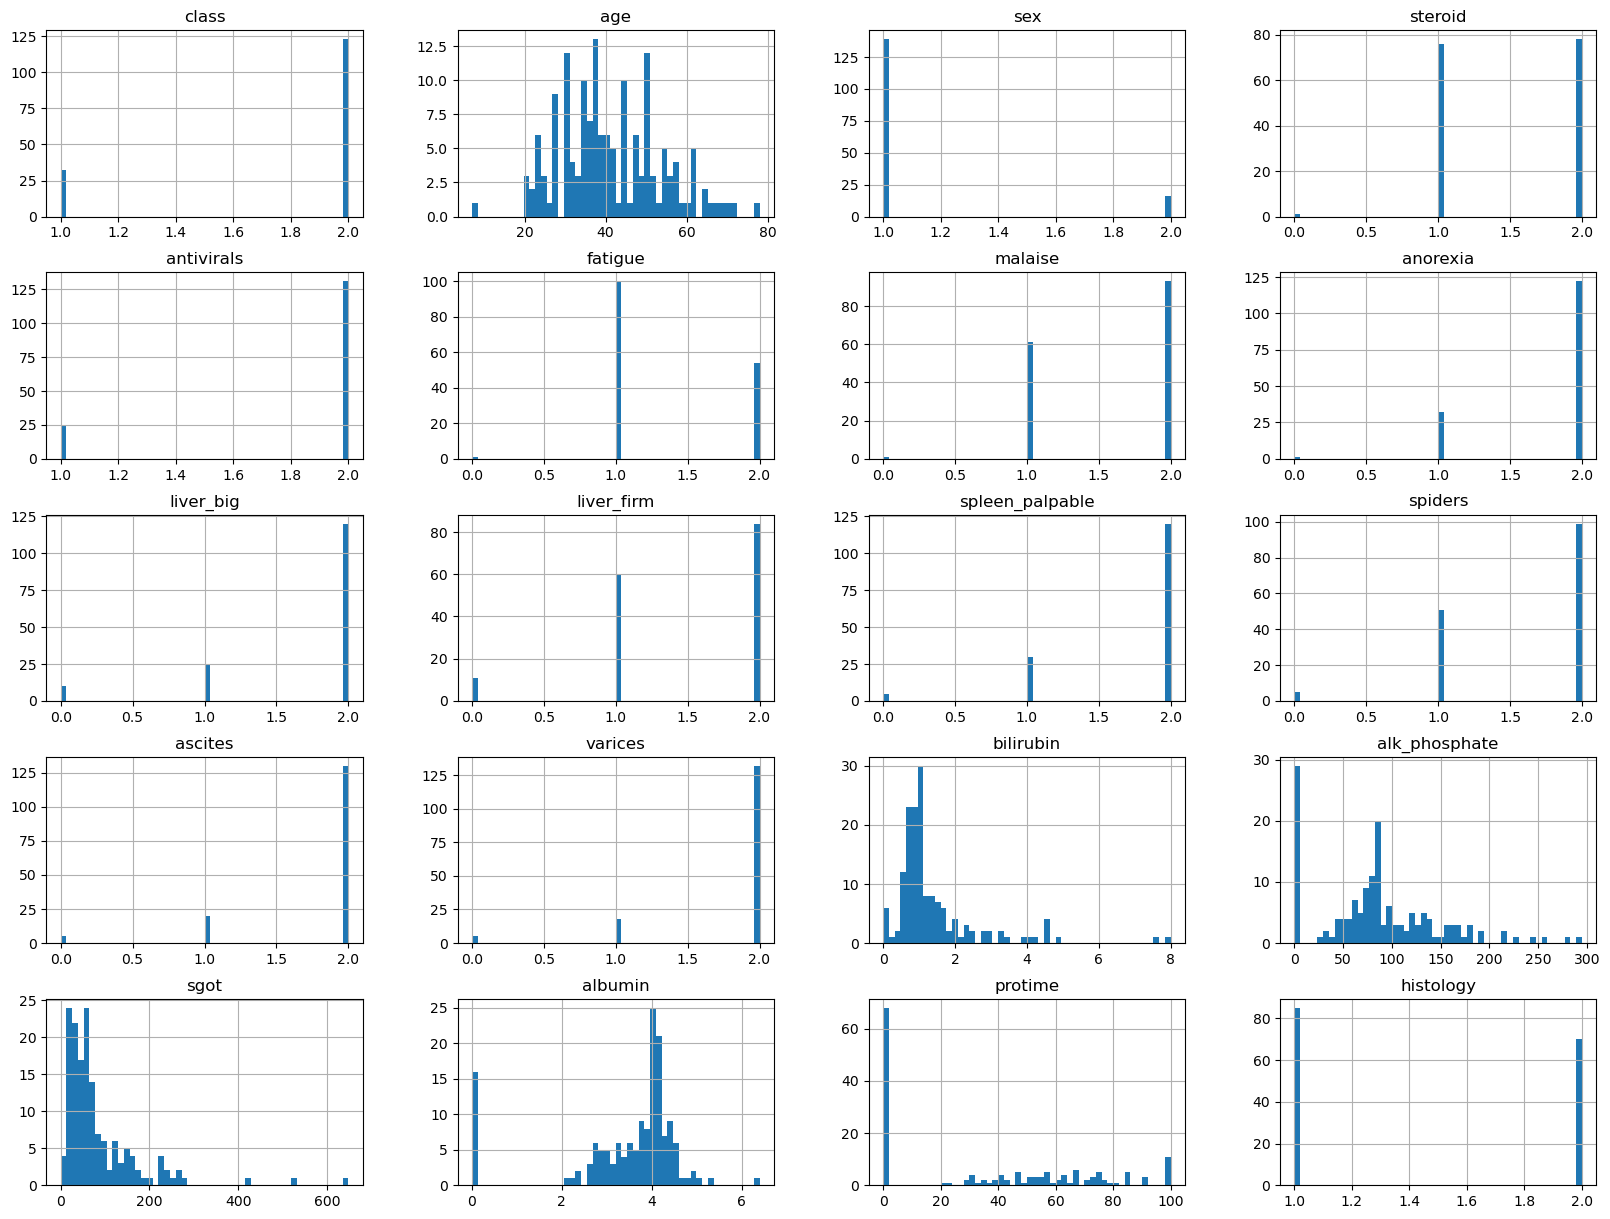

In [865]:
#plot of distribution of data
df.hist(bins=50,figsize=(20,15))
plt.show()

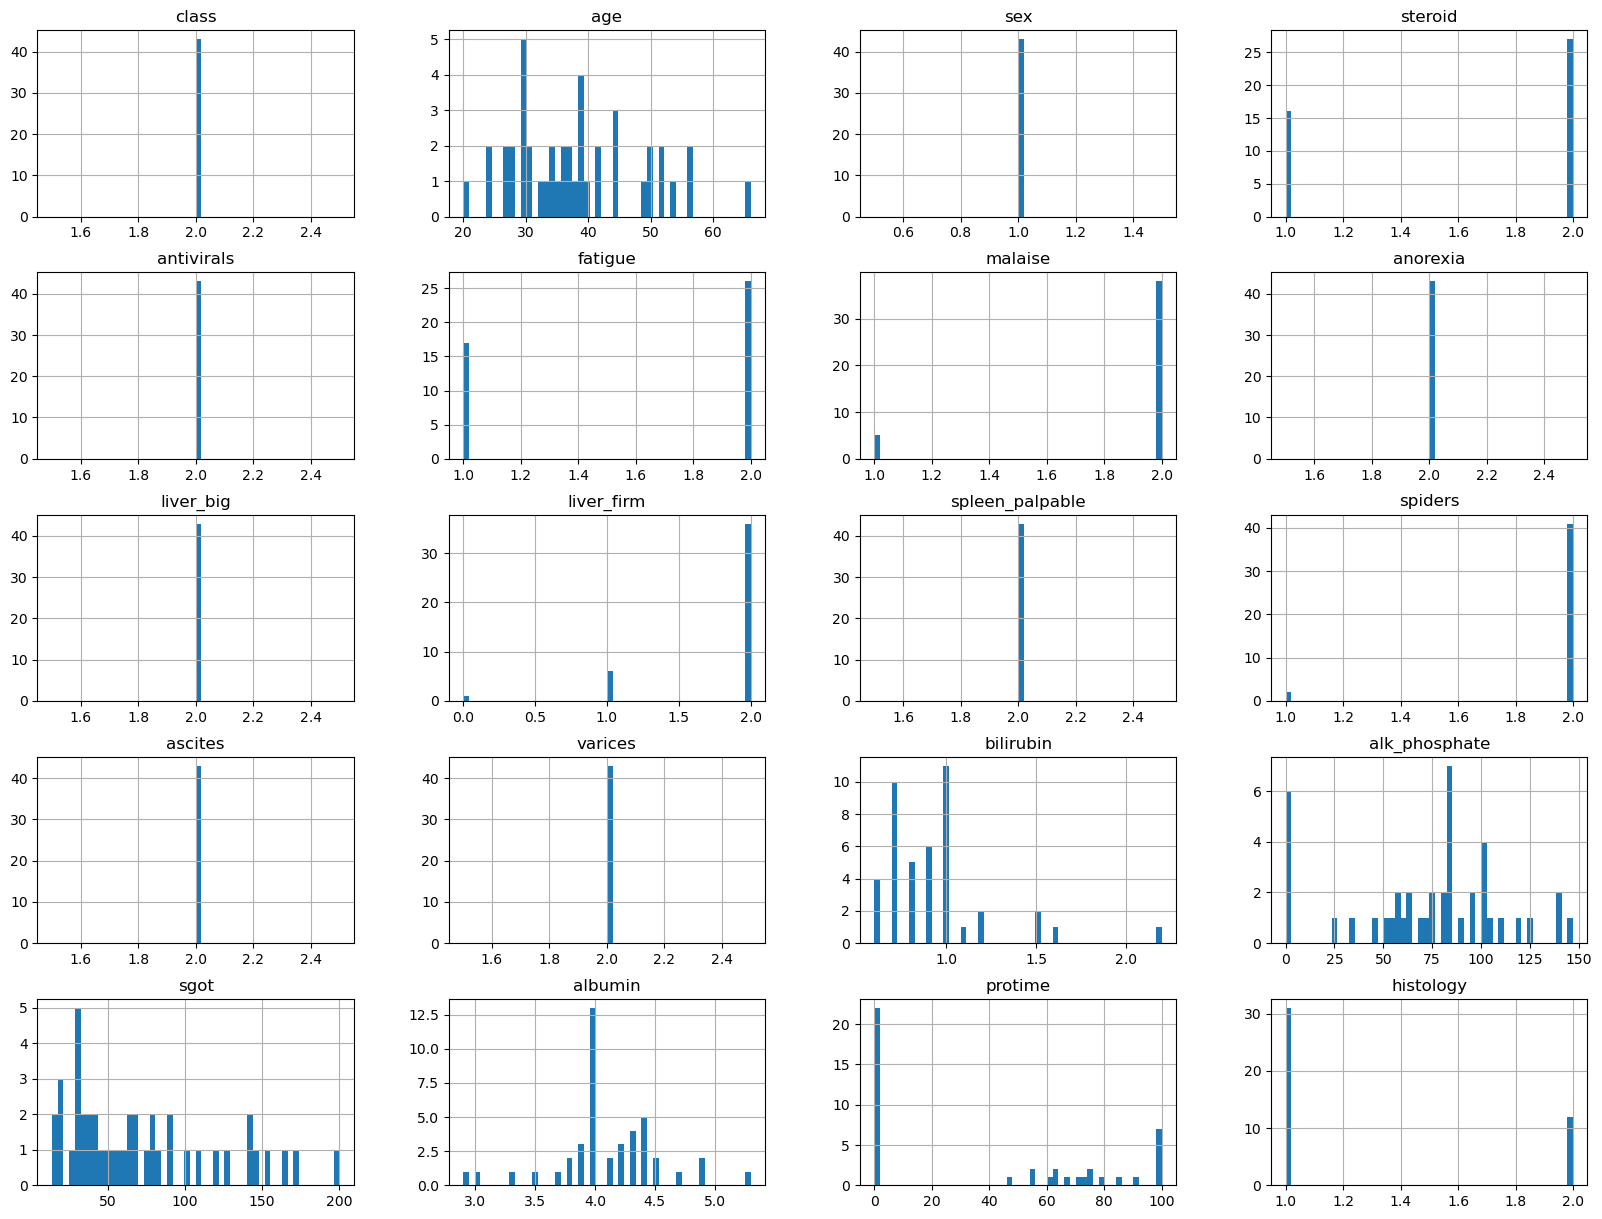

In [866]:
#plot of distribution of data without any outlier
df_no_outlier.hist(bins=50,figsize=(20,15))
plt.show()

In [867]:
#changing by mean
import pandas as pd
import numpy as np

# Assuming df is your original dataframe
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

# Calculate means of each column
means = df.mean()

# Identify outliers
outliers = ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))

# Replace outliers with the mean of the respective column
df_no_outlier_mean = df.copy()
for col in df.columns:
    df_no_outlier_mean.loc[outliers[col], col] = means[col]

# Verify the change
print(df_no_outlier_mean.head())

print('--------------------')
print(df_no_outlier_mean.describe())

print('wihtout mean')
# Verify the change
print(df_no_outlier.head())

print('--------------------')
print(df_no_outlier.describe())


C:\Users\Dell\AppData\Local\Temp\ipykernel_14956\379739718.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.793548387096774' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_no_outlier_mean.loc[outliers[col], col] = means[col]
C:\Users\Dell\AppData\Local\Temp\ipykernel_14956\379739718.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '41.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_no_outlier_mean.loc[outliers[col], col] = means[col]
C:\Users\Dell\AppData\Local\Temp\ipykernel_14956\379739718.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.103225806451613' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_no_outlier_mean.loc[ou

   class   age       sex  steroid  antivirals  fatigue  malaise  anorexia  \
0    2.0  30.0  1.103226      1.0    2.000000      2.0      2.0       2.0   
1    2.0  50.0  1.000000      1.0    2.000000      1.0      2.0       2.0   
2    2.0  41.2  1.000000      2.0    2.000000      1.0      2.0       2.0   
3    2.0  31.0  1.000000      0.0    1.845161      2.0      2.0       2.0   
4    2.0  34.0  1.000000      2.0    2.000000      2.0      2.0       2.0   

   liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  \
0   1.709677         2.0              2.0      2.0      2.0      2.0   
1   1.709677         2.0              2.0      2.0      2.0      2.0   
2   2.000000         2.0              2.0      2.0      2.0      2.0   
3   2.000000         2.0              2.0      2.0      2.0      2.0   
4   2.000000         2.0              2.0      2.0      2.0      2.0   

   bilirubin  alk_phosphate   sgot  albumin  protime  histology  
0        1.0           85.0   18.0    

FEATURE SELECTION
+ SelectKbest ->Strong relationship with output/target
+ Recursive Feature Elimination-> Select the best features which are strongly releated with our target

In [868]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [869]:
#features and labels
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [870]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [871]:
#since we are doing feature selection we need to get our columns 
xfeatures= df[['age', 'sex', 'steroid', 
               'antivirals', 'fatigue','malaise','anorexia',
               'liver_big', 'liver_firm', 'spleen_palpable', 
               'spiders','ascites', 'varices', 'bilirubin', 
               'alk_phosphate', 'sgot', 'albumin','protime', 'histology']]

ylabels=df['class']

In [872]:
#using skbest to find the best features
skb=SelectKBest(score_func=chi2,k=10)   #we want 10 best and most important features for our prediction
best_feature_fit=skb.fit(xfeatures,ylabels)

In [873]:
#higher score means the better fit
print(f"scores {best_feature_fit.scores_}")

scores [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [874]:
#transfroming 
best_feature=best_feature_fit.transform(xfeatures)

In [875]:
best_feature

array([[30. ,  2. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  2. , ...,  3.5,  0. ,  1. ],
       [78. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  2. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

In [876]:
#mapping to see which feature has highest value
feature_score=pd.DataFrame(best_feature_fit.scores_,columns=['Features_Scores'])

In [877]:
feature_score

,Features_Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [878]:
features_column_names=pd.DataFrame(xfeatures.columns,columns=['Feature_name'])
best_fit_df=pd.concat([feature_score,features_column_names],axis=1)

In [879]:
best_fit_df

,Features_Scores,Feature_name
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


In [880]:
#GET THE BEST 
#THE HIGHER THE NUMBER THE MORE IMPORTANT THE FEATURE
best_fit_df.nlargest(10,'Features_Scores') #selected 10 best features

,Features_Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [881]:
best_fit_df.nlargest(12,'Features_Scores') #selected top 12 features

,Features_Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [882]:
type(best_fit_df.nlargest(12,'Features_Scores'))

pandas.core.frame.DataFrame

In [883]:
best_fit_df.nlargest(12,'Features_Scores')['Feature_name'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

In [884]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [885]:
logit=LogisticRegression(max_iter=1000)

In [886]:
rfe=RFE(logit,n_features_to_select=8)

In [887]:
rfe_fit=rfe.fit(xfeatures,ylabels)

In [888]:
#Selection 
selected_features=pd.DataFrame(rfe_fit.support_,columns=['Selected_Features'])
ranking_features=pd.DataFrame(rfe_fit.ranking_,columns=['ranking_Features'])

In [889]:
rfe_features_df=pd.concat([features_column_names,selected_features,ranking_features],axis=1)

In [890]:
rfe_features_df

,Feature_name,Selected_Features,ranking_Features
0,age,False,9
1,sex,True,1
2,steroid,False,5
3,antivirals,False,8
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,4
8,liver_firm,False,6
9,spleen_palpable,False,7


the features with value TRUE will have to be eliminated bcoz these are not contributing much to our data

RFE we will eliminate the lower rankings or true

In [891]:
#these things also depend on domain knowledge

checking for feature importance by ExtraTreeClassifier
which feature is important

In [892]:
from sklearn.ensemble import ExtraTreesClassifier

In [893]:
et_clf=ExtraTreesClassifier()
et_clf.fit(xfeatures,ylabels)

ExtraTreesClassifier()

In [894]:
#print important 
print(et_clf.feature_importances_)

[0.05438494 0.02310739 0.02728627 0.0116461  0.02859469 0.05502732
 0.03009235 0.03965167 0.04672437 0.03853792 0.07642001 0.08260391
 0.05260392 0.09938271 0.07351766 0.04849668 0.07914349 0.06636299
 0.06641561]


In [895]:
#higher the number more important the feature

In [896]:
#finding actual features
feature_importance_df=pd.Series(et_clf.feature_importances_, index=xfeatures.columns)

In [897]:
feature_importance_df

age                0.054385
sex                0.023107
steroid            0.027286
antivirals         0.011646
fatigue            0.028595
malaise            0.055027
anorexia           0.030092
liver_big          0.039652
liver_firm         0.046724
spleen_palpable    0.038538
spiders            0.076420
ascites            0.082604
varices            0.052604
bilirubin          0.099383
alk_phosphate      0.073518
sgot               0.048497
albumin            0.079143
protime            0.066363
histology          0.066416
dtype: float64

<Axes: >

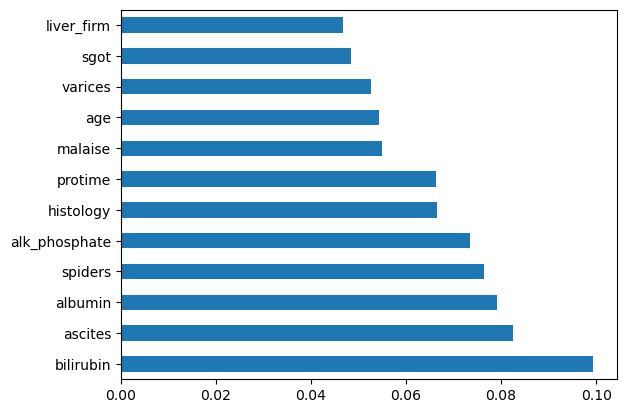

In [898]:
feature_importance_df.nlargest(12).plot(kind='barh')  #12 most imporant features

All the methods gave us almost the same features to use. IMPORTANT FINDING-> SEX IS NOT A FACTOR FOR HEPATITIS.

In [899]:
#using co relation to see relation between the data attributes

In [900]:
df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.121140,-0.130196,0.292206,0.315970,0.110715,0.102151,0.154736,0.180894,0.330194,0.332796,0.249610,-0.424523,-0.050806,-0.056679,0.296489,0.154688,-0.337856
age,-0.219647,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.095626,0.045328,0.078021,-0.191174,-0.059956,0.170780
sex,0.173051,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.039341,0.162851,-0.008991,-0.018906,0.067128,-0.137450
steroid,0.121140,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.005835,-0.042245,-0.021032,0.203109,0.032994,-0.070144
antivirals,-0.130196,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.177958,0.041764,0.095980,-0.153939,-0.276452,0.209242
fatigue,0.292206,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.243964,-0.110505,-0.175476,0.198983,0.073783,-0.131177
malaise,0.315970,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.269910,-0.114810,-0.177297,0.224605,0.067186,-0.116964
anorexia,0.110715,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.244095,0.035984,-0.188183,0.133743,0.108322,-0.049702
liver_big,0.102151,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.028856,0.018895,-0.026293,0.105555,0.174677,-0.104757
liver_firm,0.154736,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.069352,-0.179977,-0.149876,0.059700,0.083312,-0.206632


<Axes: >

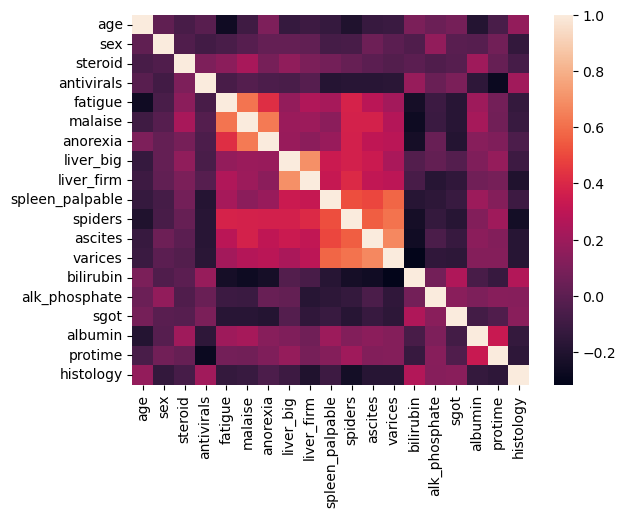

In [901]:
#using heatmap for co relation
sns.heatmap(xfeatures.corr())

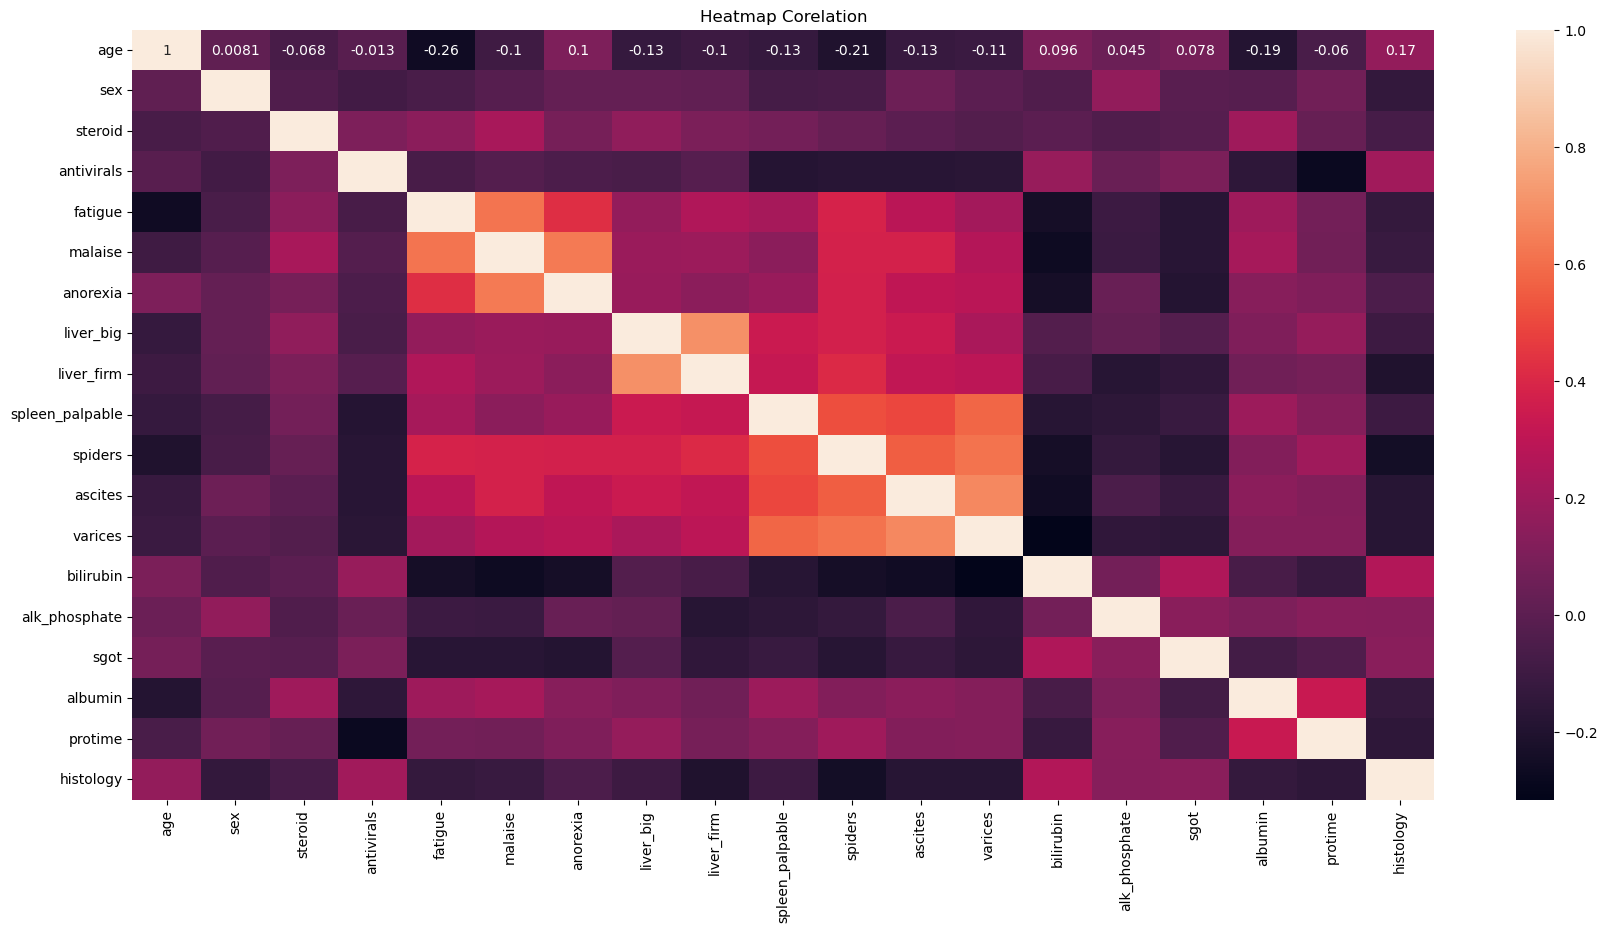

In [902]:
#using heatmap for co relation with annot TRUE
plt.figure(figsize=(21,10))
Heatmap=sns.heatmap(xfeatures.corr(),annot=True)
Heatmap.set_title('Heatmap Corelation')
plt.show()

MODEL BUILDING

Steps->
Giving appropriate/relevant Features and labels
Pre processing-> training/testing/splitting

Apply models->
LogisticRegression
RandomForest
DescisionTree


In [903]:
#importing models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [904]:
#features for initial data
xfeatures

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [905]:
ylabels=df['class']

#selected features but we also added sex to it and arrange it too
['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices','sex']

In [906]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [907]:
#best features extracted
xfeatures_best=df[['age', 'sex','steroid','antivirals','fatigue','spiders','ascites','varices','bilirubin','alk_phosphate','sgot','albumin','protime','histology']]

In [908]:
#training testing dataset for normal dataset
X_train,X_test,Y_train,Y_test=train_test_split(xfeatures,ylabels,test_size=0.30,random_state=1234)

In [909]:
#traing testing splitting for most important features data
X_train_best,X_test_best,Y_train_best,Y_test_best=train_test_split(xfeatures_best,ylabels,test_size=0.30,random_state=1234)

MODEL BUILDING

In [910]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [911]:
#model accurcary
#method 1
logreg.score(X_test,Y_test)  #we got accuracy of 72.34%

0.723404255319149

In [912]:
#method 2
logreg.predict(X_test)

array([2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2], dtype=int64)

In [913]:
print(list(Y_test))

[2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2]


In [914]:
accuracy_score(Y_test,logreg.predict(X_test))

0.723404255319149

In [915]:
#what if we use best features on our model
model_log_with_best_features=LogisticRegression()
model_log_with_best_features.fit(X_train_best,Y_train_best)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [916]:
model_log_with_best_features.score(X_test_best,Y_test_best)  #accuracy->72.34%

0.723404255319149

In [917]:
#we got same accuracy whether we used whole features or most important features

In [918]:
#let's make a predicition
X_test.iloc[1]

age                 44.0
sex                  1.0
steroid              1.0
antivirals           2.0
fatigue              1.0
malaise              1.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      2.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            3.0
alk_phosphate      114.0
sgot                65.0
albumin              3.5
protime              0.0
histology            2.0
Name: 97, dtype: float64

In [919]:
res_dict={"Die":1,"Live":2}
X1=X_test.iloc[1] #selected a random value at index 1 in our testing dataset 

In [920]:
#reshaping 
logreg.predict(np.array(X1).reshape(1,-1)) #currenlty X1 is a random data with all factors but we dropped some so it will give error currenlty. so reshape it.
#we got the predicitioon for that random value from test dataset

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

Alternative classification Algorithms
1)Decision tree 

In [921]:
clf=DecisionTreeClassifier()


In [922]:
#fit trainig 
clf.fit(X_train_best,Y_train_best)

DecisionTreeClassifier()

In [923]:
#Accuracy score
clf.score(X_test_best,Y_test_best)  #accuracy->78.72%

0.7659574468085106

Alternative algorithm 2) KNN

In [924]:
from sklearn.neighbors import KNeighborsClassifier

In [925]:
knn=KNeighborsClassifier(n_neighbors=9) #we gave three neighbours-> 57.44% accuracy
"""
4->59.57
5->63.82
6->65.95
7->70.21
8->68.08
9->72.34
10->70.21
11->70.21
12->70.21"""


'\n4->59.57\n5->63.82\n6->65.95\n7->70.21\n8->68.08\n9->72.34\n10->70.21\n11->70.21\n12->70.21'

In [926]:
#fittng
knn.fit(X_train_best,Y_train_best)

KNeighborsClassifier(n_neighbors=9)

In [927]:
#Score
knn.score(X_test_best,Y_test_best)

0.723404255319149

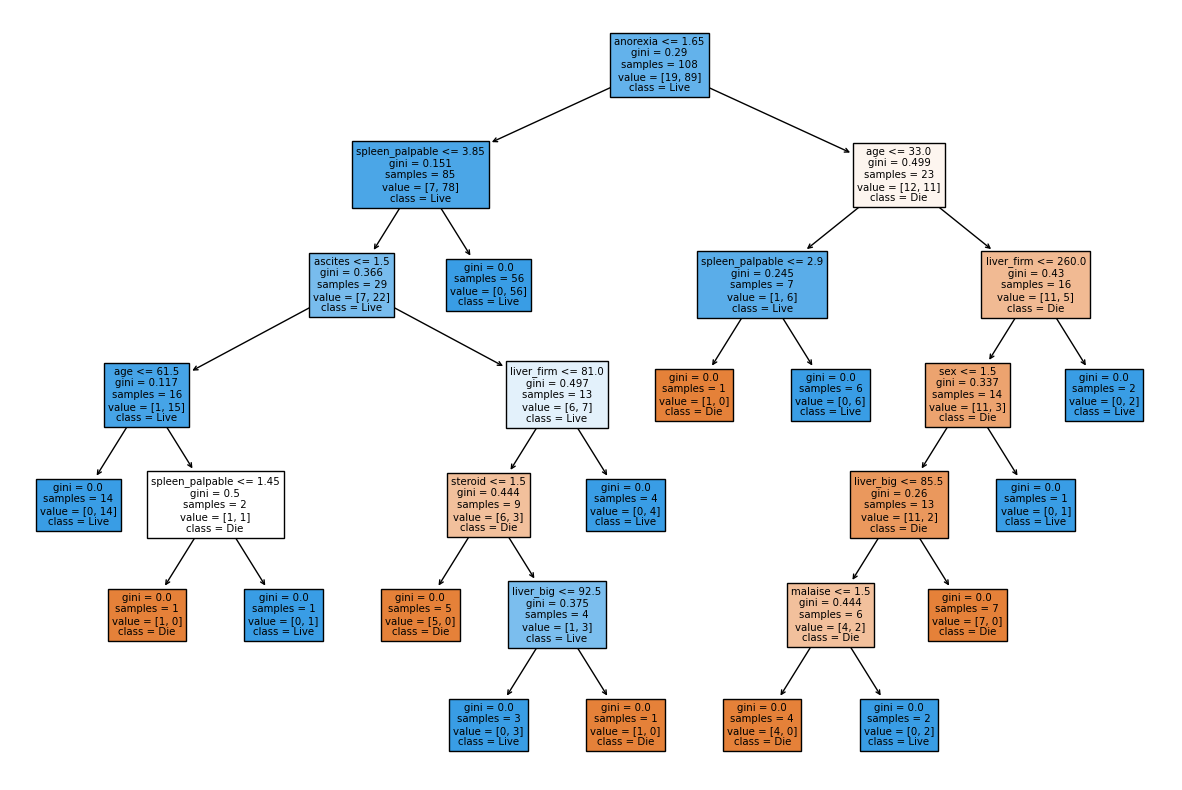

In [928]:
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming clf has already been trained with the training data
# clf = DecisionTreeClassifier(random_state=0)
# clf.fit(X_train_best, Y_train_best)
feature_names_best=['age','sex','steroid','antivirals','fatigue','malaise','anorexia','malaise','anorexia','liver_big','liver_firm','spleen_palpable','spiders','ascites','varices','bilirubin','alk_phosphate','sgot','albumin','protime','histology']
target_names=['Die','Live']
# Plot the decision tree using matplotlib
# Plot the decision tree using matplotlib
plt.figure(figsize=(15,10))
tree.plot_tree(clf, feature_names=feature_names_best, class_names=target_names, filled=True)
plt.show()

In [929]:
#trying to find accuracy using naive bayes


In [930]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Initialize the Gaussian Naive Bayes classifier
nb_clf = GaussianNB()

# Fit the model
nb_clf.fit(X_train_best, Y_train_best)

# Predict on the test set
y_pred_nb = nb_clf.predict(X_test_best)

# Calculate the accuracy
nb_accuracy = accuracy_score(Y_test_best, y_pred_nb)
print(f'Naive Bayes Test Set Accuracy: {nb_accuracy:.3f}')

# Generate the confusion matrix
nb_cm = confusion_matrix(Y_test_best, y_pred_nb)
print(f'Confusion Matrix:\n{nb_cm}')

# Generate the classification report
nb_cr = classification_report(Y_test_best, y_pred_nb)
print(f'Classification Report:\n{nb_cr}')


Naive Bayes Test Set Accuracy: 0.787
Confusion Matrix:
[[11  2]
 [ 8 26]]
Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.85      0.69        13
           2       0.93      0.76      0.84        34

    accuracy                           0.79        47
   macro avg       0.75      0.81      0.76        47
weighted avg       0.83      0.79      0.80        47



Interpret Model and Evaluation
we will use Eli5,Lime

In [931]:
#interpretting using Lime
import lime
import lime.lime_tabular

In [932]:
"""create Lime Explainer
TabularExplainer for tables
TextExplainer for texts
ImageExplainer for images
"""

'create Lime Explainer\nTabularExplainer for tables\nTextExplainer for texts\nImageExplainer for images\n'

In [933]:
feature_names_best

['age',
 'sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'bilirubin',
 'alk_phosphate',
 'sgot',
 'albumin',
 'protime',
 'histology']

In [934]:
target_names

['Die', 'Live']

In [935]:
class_names=['Die(1)','Live(2)']

In [936]:
#create explainer
explainer=lime.lime_tabular.LimeTabularExplainer(X_train_best.values,
                                                 feature_names=feature_names_best,
                                                class_names=class_names,
                                                discretize_continuous=True)


In [937]:
X1

age                 44.0
sex                  1.0
steroid              1.0
antivirals           2.0
fatigue              1.0
malaise              1.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      2.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            3.0
alk_phosphate      114.0
sgot                65.0
albumin              3.5
protime              0.0
histology            2.0
Name: 97, dtype: float64

In [938]:
logreg.predict(np.array(X1).reshape(1,-1))

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [939]:
import eli5
from eli5.sklearn import PermutationImportance
import numpy as np
# Assuming logreg is your trained logistic regression model
# Assuming X1 is the instance you want to explain
features_column_names_all = [
    'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 
    'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 
    'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime', 'histology'
]

# Ensure X1 is a 1D array (convert pandas Series to NumPy array)
X1_instance = X1.values.reshape(1, -1)  # Assuming X1 is a pandas Series

# Explain weights of the logistic regression model
eli5.show_weights(logreg, feature_names=features_column_names_all)

# Explain a single prediction
explanation = eli5.explain_prediction(logreg, X1_instance[0], feature_names=features_column_names_all)
#eli5.show_prediction(logreg, X1_instance[0], feature_names=features_column_names_all)

# Show explanation in notebook
eli5.show_prediction(clf,np.array(X_test_best)[1])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [940]:
#how each feature contributes towards prediction

eli5.show_weights(logreg, feature_names=features_column_names_all)

Weight?,Feature
+1.374,sex
+0.858,spiders
+0.725,malaise
+0.714,antivirals
+0.610,albumin
+0.568,fatigue
+0.495,liver_firm
+0.425,steroid
+0.275,<BIAS>
+0.084,liver_big


In [941]:
"""since it is not visible here it is after switiching to light mode
weight feature
+1.374	sex
+0.858	spiders
+0.725	malaise
+0.714	antivirals
+0.610	albumin
+0.568	fatigue
+0.495	liver_firm
+0.425	steroid
+0.275	<BIAS>
+0.084	liver_big
+0.006	sgot
-0.006	protime
-0.007	ascites
-0.008	alk_phosphate
-0.040	spleen_palpable
-0.048	age
-0.294	varices
-0.654	anorexia
-1.059	bilirubin
-1.208	histology
"""

'since it is not visible here it is after switiching to light mode\nweight feature\n+1.374\tsex\n+0.858\tspiders\n+0.725\tmalaise\n+0.714\tantivirals\n+0.610\talbumin\n+0.568\tfatigue\n+0.495\tliver_firm\n+0.425\tsteroid\n+0.275\t<BIAS>\n+0.084\tliver_big\n+0.006\tsgot\n-0.006\tprotime\n-0.007\tascites\n-0.008\talk_phosphate\n-0.040\tspleen_palpable\n-0.048\tage\n-0.294\tvarices\n-0.654\tanorexia\n-1.059\tbilirubin\n-1.208\thistology\n'

In [942]:
feature_names_best2=['sex',
'spiders',
'malaise',
'antivirals',
'albumin',
'fatigue',
'liver_firm',
'steroid',
'<BIAS>',
'liver_big',
'sgot',
'protime',
'ascites',
'alk_phosphate',
'age',
'varices',
'anorexia',
'bilirubin',
'histology']


In [943]:
explanation = eli5.explain_prediction(logreg, X1_instance[0], feature_names=feature_names_best2, target_names=class_names)

# Show the explanation
eli5.show_prediction(logreg, X1_instance[0], feature_names=feature_names_best2, target_names=class_names)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [944]:
"""#evaluation of model
+confusion matrix
+classification report
+Accuracy Score
"""

'#evaluation of model\n+confusion matrix\n+classification report\n+Accuracy Score\n'

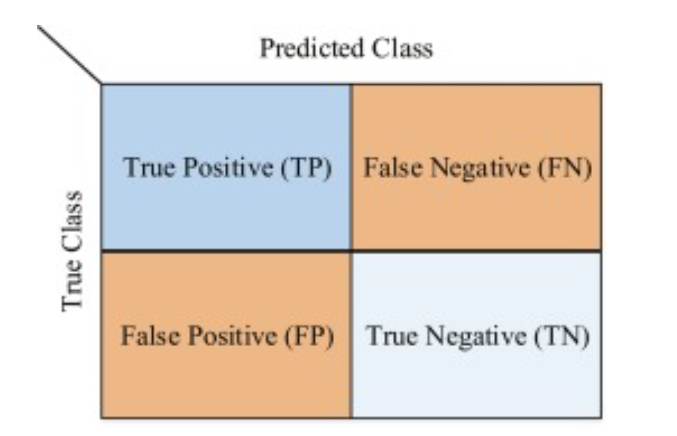

In [945]:
from sklearn.metrics import confusion_matrix

In [946]:
#for logistic regression
y_pred=logreg.predict(X_test)

In [947]:
#accuracy score
accuracy_score(Y_test,y_pred)

0.723404255319149

In [948]:
#using confusion matrix
cmlogreg=confusion_matrix(Y_test,y_pred)

In [949]:
cmlogreg

array([[ 6,  7],
       [ 6, 28]], dtype=int64)

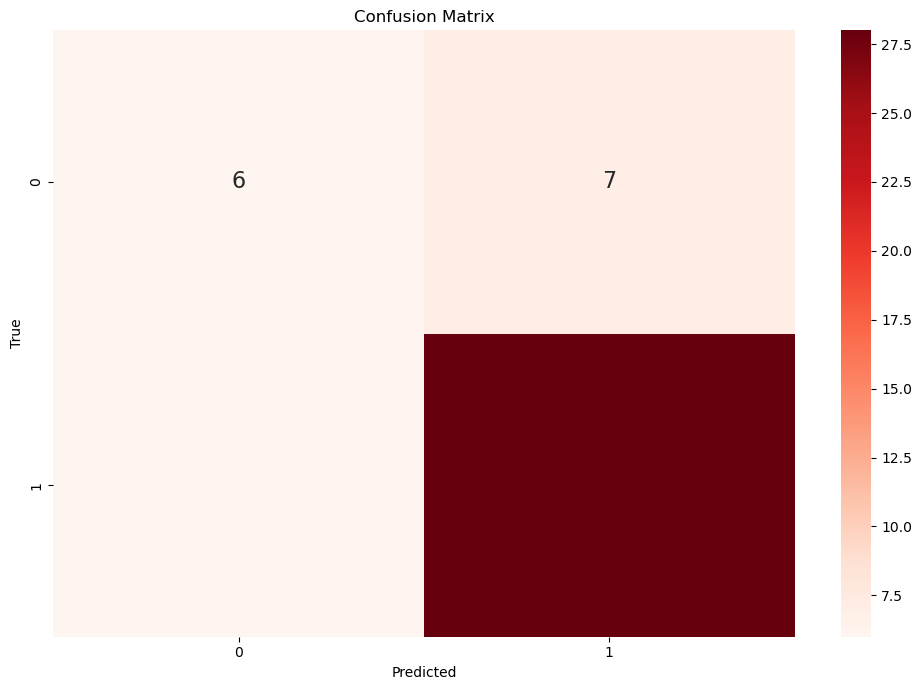

In [1008]:
import seaborn as sns
plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
sns.heatmap(cmlogreg, annot=True, cmap='Reds', fmt='g', annot_kws={"size": 16})  # 'fmt' controls the format of the annotations
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()  
plt.show()

True Negative (TN): 6
False Positive (FP): 7
False Negative (FN): 6
True Positive (TP): acy:
Acc= TN+TP/TN+FP+FN+TP=6+28/6+7+6+28=0.7237+6+28
6+8
​
 / 47
4​ 0./23
rcs/in:
recis
35
≈
0.800
Precision= 
PFP
T/(

=
8+)28/
​
=35/
2​
 ≈
=
28
28
6=/28
3≈0.2/Rcl=/TPF
TPficity
=
�
�
𝑇
𝑁

𝐹
/�
=
6
+
7
6
3
≈0462
/pecifcty= T+FP


Recall
Precision
+
Recall
=
2
×
0.800
×
0.824
0.800
+
0.824
≈
0.812
F1-score= 
Precision+Recall
2×Precision×Recall
​
 = 
0.800+0.824
2×0.800×0.824
​
 ≈0.812
Based on these metrics:

The accuracy of your model is approximately 72.3%, meaning it correctly classifies about 72.3% of the samples.
The precision is approximately 80.0%, indicating that when the model predicts a positive outcome, it is correct about 80.0% of the time.
The recall (or sensitivity) is approximately 82.4%, suggesting that the model correctly identifies about 82.4% of the actual positive cases.
The specificity is approximately 46.2%, indicating that the model correctly identifies about 46.2% of the actual negative cases.
The F1-score is approximately 81.2%, providing a balance between precision and recall.

In [951]:
"""#PLOTTING
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()
"""

'#PLOTTING\nfrom sklearn.metrics import ConfusionMatrixDisplay\ndisp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)\ndisp.plot()\nplt.show()\n'

In [952]:
tp,tf,fn,fp=confusion_matrix(Y_test,y_pred).ravel()

In [953]:
tp

6

In [954]:
tf

7

In [955]:
fn

6

In [956]:
fp

28

In [957]:
#classification report
from sklearn.metrics import classification_report


In [958]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       0.50      0.46      0.48        13
           2       0.80      0.82      0.81        34

    accuracy                           0.72        47
   macro avg       0.65      0.64      0.65        47
weighted avg       0.72      0.72      0.72        47



In [959]:
#for descision tree classisifier


In [960]:
from sklearn.metrics import confusion_matrix

In [961]:
y_pred2=clf.predict(X_test_best)
accuracy_score(Y_test,y_pred2)

0.7659574468085106

In [962]:
#using confusion matrix
cm_dtc=confusion_matrix(Y_test,y_pred2)
print(cm_dtc)

[[ 9  4]
 [ 7 27]]


<Axes: >

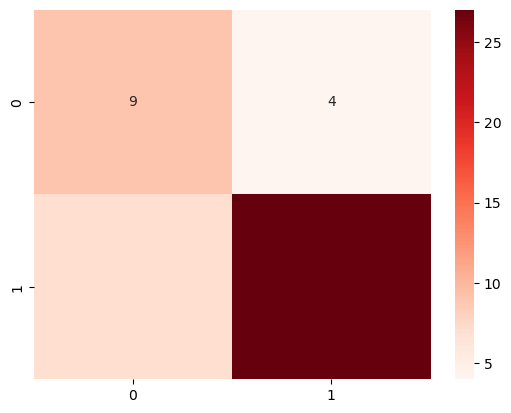

In [963]:
import seaborn as sns
sns.heatmap(cm_dtc,annot=True,cmap='Reds')

In [964]:
tp_dtc,tf_dtc,fn_dtc,fp_dtc=cm_dtc=confusion_matrix(Y_test,y_pred2).ravel()

In [965]:
tp_dtc

9

In [966]:
tf_dtc

4

In [967]:
fn_dtc

7

In [968]:
fp_dtc

27

In [969]:
#classification report
from sklearn.metrics import classification_report

In [970]:
print(classification_report(Y_test,y_pred2))

              precision    recall  f1-score   support

           1       0.56      0.69      0.62        13
           2       0.87      0.79      0.83        34

    accuracy                           0.77        47
   macro avg       0.72      0.74      0.73        47
weighted avg       0.79      0.77      0.77        47



In [971]:
#for knn

In [972]:
from sklearn.metrics import confusion_matrix

In [973]:
y_pred3=knn.predict(X_test_best)
accuracy_score(Y_test,y_pred3)

0.723404255319149

In [974]:
#using confusion matrix
cm_knn=confusion_matrix(Y_test,y_pred3)
print(cm_knn)

[[ 1 12]
 [ 1 33]]


<Axes: >

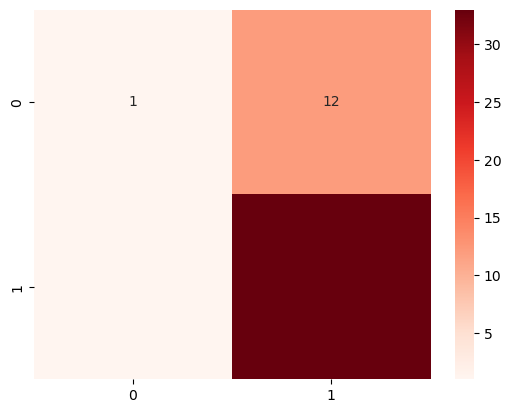

In [975]:
import seaborn as sns
sns.heatmap(cm_knn, annot=True,cmap='Reds')

In [976]:
#classification report
from sklearn.metrics import classification_report

In [977]:
print(classification_report(Y_test,y_pred3))

              precision    recall  f1-score   support

           1       0.50      0.08      0.13        13
           2       0.73      0.97      0.84        34

    accuracy                           0.72        47
   macro avg       0.62      0.52      0.48        47
weighted avg       0.67      0.72      0.64        47



In [978]:
#trying to hypertune my models based on articles hazaro errors aaege

In [979]:
#manual method
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter sets

params_list = [
    {'criterion': 'gini', 'splitter': 'best', 'max_depth': 50},
    {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 70},
    {'criterion': 'gini', 'splitter': 'random', 'max_depth': 60},
    {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 80},
    {'criterion': 'gini', 'splitter': 'best', 'max_depth': 40}
]

# Iterate over each set of hyperparameters
for params in params_list:
    model = DecisionTreeClassifier(**params)
    model.fit(X_train_best, Y_train_best)
    preds = model.predict(X_test_best)
    accuracy = accuracy_score(Y_test_best, preds)
    print(f'Accuracy with params {params}: {round(accuracy, 3)}')


Accuracy with params {'criterion': 'gini', 'splitter': 'best', 'max_depth': 50}: 0.766
Accuracy with params {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 70}: 0.766
Accuracy with params {'criterion': 'gini', 'splitter': 'random', 'max_depth': 60}: 0.681
Accuracy with params {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 80}: 0.83
Accuracy with params {'criterion': 'gini', 'splitter': 'best', 'max_depth': 40}: 0.787


In [980]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [40, 50, 60, 70, 80]
}

# Initialize the classifier
clf = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_best, Y_train_best)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score}')

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_best)
test_accuracy = accuracy_score(Y_test_best, y_pred)

print(f'Test Set Accuracy: {test_accuracy}')


Best Parameters: {'criterion': 'gini', 'max_depth': 70, 'splitter': 'best'}
Best Cross-Validation Score: 0.8164502164502163
Test Set Accuracy: 0.7659574468085106


using randomized search Hyper tuning

In [981]:
#using randomized search 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(40, 81)  # Random integer values between 40 and 80
}

# Initialize the classifier
clf = DecisionTreeClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train_best, Y_train_best)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score}')

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_best)
test_accuracy = accuracy_score(Y_test_best, y_pred)

print(f'Test Set Accuracy: {test_accuracy}')


Best Parameters: {'criterion': 'gini', 'max_depth': 61, 'splitter': 'best'}
Best Cross-Validation Score: 0.8164502164502163
Test Set Accuracy: 0.7659574468085106


In [982]:
#for naive bias report
from sklearn.metrics import classification_report

# Assuming 'nb_clf' is your trained Naive Bayes classifier and 'X_test_best' and 'Y_test_best' are your test features and labels

# Predict the labels for the test set
y_pred_nb = nb_clf.predict(X_test_best)

# Generate and print the classification report
print("Naive Bayes Classification Report:")
print(classification_report(Y_test_best, y_pred_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.85      0.69        13
           2       0.93      0.76      0.84        34

    accuracy                           0.79        47
   macro avg       0.75      0.81      0.76        47
weighted avg       0.83      0.79      0.80        47



In [983]:
#<---------TRYING TO IMPLEMENT BOOSTING---------->

In [984]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

# Fit the model on the training data
gb_clf.fit(X_train_best, Y_train_best)

# Predictions on the test data
gb_preds = gb_clf.predict(X_test_best)

# Calculate accuracy
gb_accuracy = accuracy_score(Y_test_best, gb_preds)
print(f"Gradient Boosting Test Set Accuracy: {gb_accuracy}")


Gradient Boosting Test Set Accuracy: 0.7872340425531915


In [985]:
#for report of gradient boosting
gb_report = classification_report(Y_test_best, gb_preds)

print("Gradient Boosting Classification Report:")
print(gb_report)

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.62      0.62        13
           2       0.85      0.85      0.85        34

    accuracy                           0.79        47
   macro avg       0.73      0.73      0.73        47
weighted avg       0.79      0.79      0.79        47



In [986]:
#------------NAIVE BIAS----------------
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Initialize the Naive Bayes classifier
nb_clf = GaussianNB()

# Fit the classifier on the training data
nb_clf.fit(X_train_best, Y_train_best)

# Predict on the test data
nb_preds = nb_clf.predict(X_test_best)

# Generate the classification report
nb_report = classification_report(Y_test_best, nb_preds)

print("Naive Bayes Classification Report:")
print(nb_report)


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.85      0.69        13
           2       0.93      0.76      0.84        34

    accuracy                           0.79        47
   macro avg       0.75      0.81      0.76        47
weighted avg       0.83      0.79      0.80        47



In [987]:
#--------------NAIVE BIAS WIHT K FOLD CROSS VALIDATION----------------
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform 10-fold cross-validation
cv_scores = cross_val_score(nb_classifier, xfeatures_best, ylabels, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean accuracy:", mean_accuracy)
#The final accuracy obtained by using 10-fold cross-validation with Naive Bayes is approximately 74.4%.

Cross-validation scores: [0.875      0.875      0.875      0.9375     0.8125     0.73333333
 0.73333333 0.53333333 0.6        0.46666667]
Mean accuracy: 0.7441666666666666


In [1009]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_best, Y_train_best)

# Make predictions
y_pred = rf.predict(X_test_best)

# Evaluate the model
accuracy = accuracy_score(Y_test_best, y_pred)
classification_rep = classification_report(Y_test_best, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

cm_dtc=confusion_matrix(Y_test,y_pred)
print(cm_dtc)

Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.54      0.58        13
           2       0.83      0.88      0.86        34

    accuracy                           0.79        47
   macro avg       0.73      0.71      0.72        47
weighted avg       0.78      0.79      0.78        47

[[ 7  6]
 [ 4 30]]


In [989]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store training and testing accuracies
model_accuracies = {}

# Loop through each model, fit the model, and calculate accuracies
for name, model in models.items():
    # Fit the model
    model.fit(X_train_best, Y_train_best)
    
    # Predict on training and testing data
    train_pred = model.predict(X_train_best)
    test_pred = model.predict(X_test_best)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(Y_train_best, train_pred)
    test_accuracy = accuracy_score(Y_test_best, test_pred)
    
    # Store the accuracies in the dictionary
    model_accuracies[name] = {
        "Training Accuracy": train_accuracy,
        "Testing Accuracy": test_accuracy
    }

# Print the accuracies for all models
for model_name, accuracies in model_accuracies.items():
    print(f"{model_name} - Training Accuracy: {accuracies['Training Accuracy']:.2f}, Testing Accuracy: {accuracies['Testing Accuracy']:.2f}")


Logistic Regression - Training Accuracy: 0.90, Testing Accuracy: 0.72
Decision Tree - Training Accuracy: 1.00, Testing Accuracy: 0.79
Random Forest - Training Accuracy: 1.00, Testing Accuracy: 0.79
K-Nearest Neighbors - Training Accuracy: 0.86, Testing Accuracy: 0.64
Naive Bayes - Training Accuracy: 0.69, Testing Accuracy: 0.79
Gradient Boosting - Training Accuracy: 1.00, Testing Accuracy: 0.79


In [990]:
X_test_best

,age,sex,steroid,antivirals,fatigue,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
58,64,1,2,1,1,2,2,2,1.0,80,38,4.3,74,1
97,44,1,1,2,1,1,2,2,3.0,114,65,3.5,0,2
108,54,1,1,1,2,2,2,2,1.0,155,225,3.6,67,2
29,51,1,1,1,1,2,2,2,1.0,78,58,4.6,52,1
6,51,1,1,2,1,1,2,2,0.0,0,0,0.0,0,1
133,72,1,2,1,1,2,2,2,1.0,115,52,3.4,50,2
150,46,1,2,2,1,1,1,1,7.6,0,242,3.3,50,2
74,50,1,2,2,2,2,2,2,1.5,100,100,5.3,0,1
117,50,1,2,2,2,2,2,2,1.0,139,81,3.9,62,2
88,38,1,1,2,1,1,1,1,1.2,118,16,2.8,0,2


In [991]:
#plots for all algos by gpt 
X_test_best

,age,sex,steroid,antivirals,fatigue,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
58,64,1,2,1,1,2,2,2,1.0,80,38,4.3,74,1
97,44,1,1,2,1,1,2,2,3.0,114,65,3.5,0,2
108,54,1,1,1,2,2,2,2,1.0,155,225,3.6,67,2
29,51,1,1,1,1,2,2,2,1.0,78,58,4.6,52,1
6,51,1,1,2,1,1,2,2,0.0,0,0,0.0,0,1
133,72,1,2,1,1,2,2,2,1.0,115,52,3.4,50,2
150,46,1,2,2,1,1,1,1,7.6,0,242,3.3,50,2
74,50,1,2,2,2,2,2,2,1.5,100,100,5.3,0,1
117,50,1,2,2,2,2,2,2,1.0,139,81,3.9,62,2
88,38,1,1,2,1,1,1,1,1.2,118,16,2.8,0,2


In [992]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


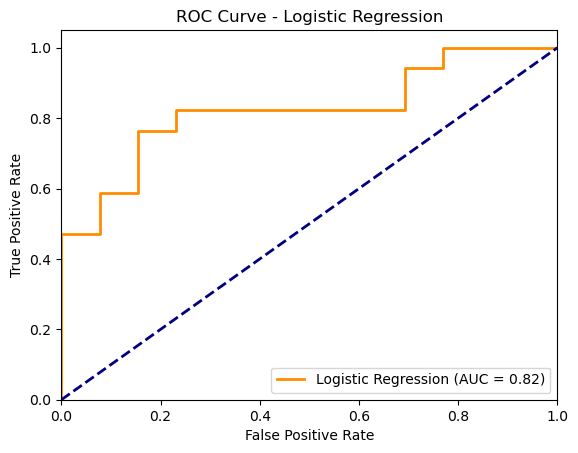

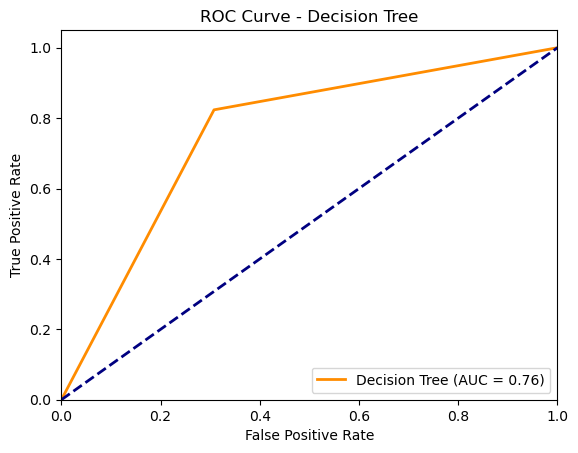

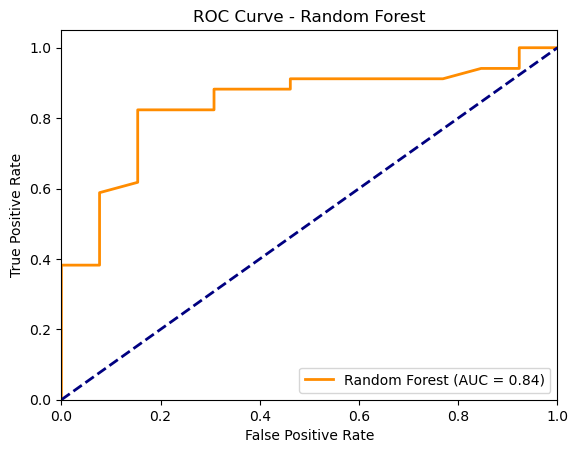

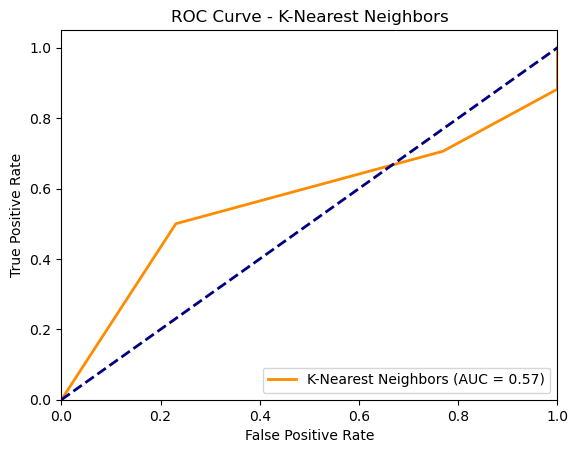

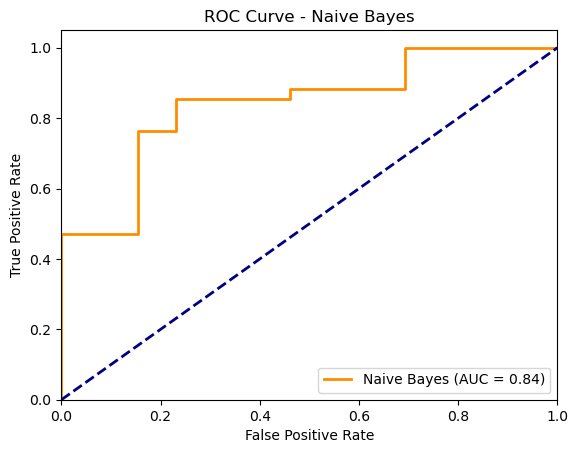

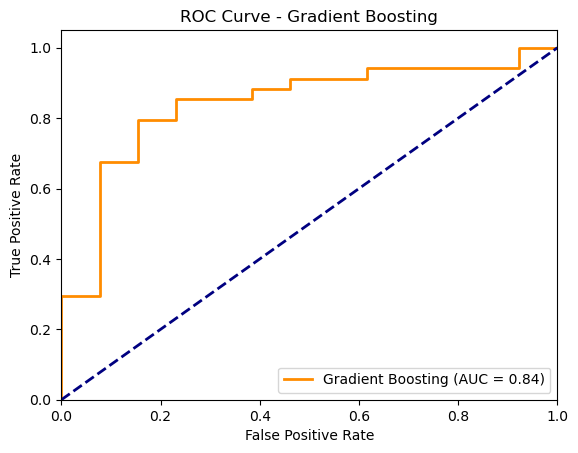

In [993]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_train, Y_train, X_test, Y_test, model_name):
    # Fit the model on the training data
    model.fit(X_train, Y_train)
    
    # Predict probabilities for the test data
    prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(Y_test, prob, pos_label=2)  # Specify pos_label as 2 or whichever is your positive label
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Usage
for model_name, model in models.items():
    plot_roc_curve(model, X_train_best, Y_train_best, X_test_best, Y_test_best, model_name)


In [994]:
def plot_roc_curve(model, X_train, Y_train, X_test, Y_test, model_name):
    # Fit the model on the training data
    model.fit(X_train, Y_train)
    
    # Predict probabilities for the test data
    prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(Y_test, prob, pos_label=2)  # Specify pos_label as 2 or whichever is your positive label
    roc_auc = auc(fpr, tpr)
    
    return fpr, tpr, roc_auc


In [995]:
roc_data = {}

for model_name, model in models.items():
    fpr, tpr, roc_auc = plot_roc_curve(model, X_train_best, Y_train_best, X_test_best, Y_test_best, model_name)
    roc_data[model_name] = (fpr, tpr, roc_auc)


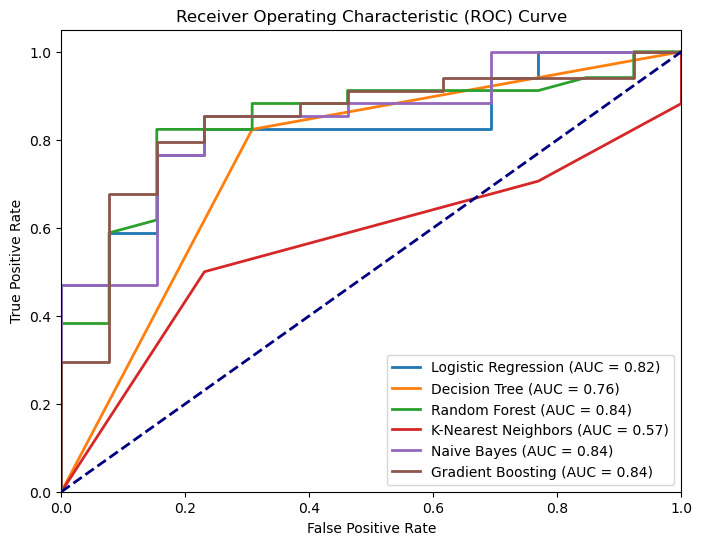

In [996]:
plt.figure(figsize=(8, 6))
lw = 2

for model_name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=lw, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


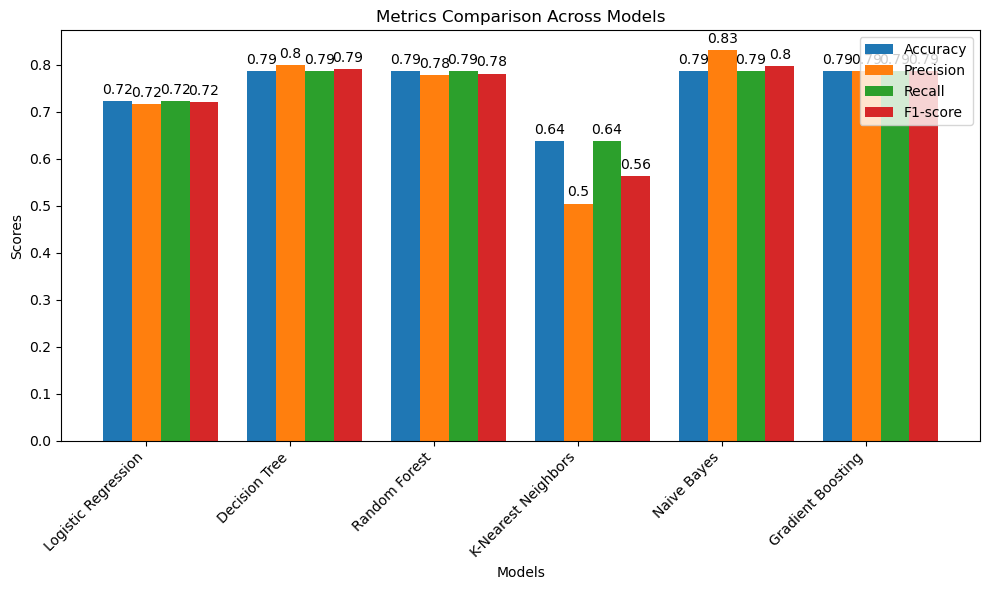

In [997]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have defined X_train_best, Y_train_best, X_test_best, Y_test_best previously

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Calculate metrics for each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_best, Y_train_best)
    
    # Predict on test set
    y_pred = model.predict(X_test_best)
    
    # Calculate metrics
    report = classification_report(Y_test_best, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    
    # Store metrics
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-score'].append(f1)

# Convert metrics to numpy arrays for plotting convenience
model_names = metrics['Model']
accuracy_scores = np.array(metrics['Accuracy'])
precision_scores = np.array(metrics['Precision'])
recall_scores = np.array(metrics['Recall'])
f1_scores = np.array(metrics['F1-score'])

# Plotting bar plot
x = np.arange(len(model_names))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x, precision_scores, width, label='Precision')
rects3 = ax.bar(x + width, recall_scores, width, label='Recall')
rects4 = ax.bar(x + 2*width, f1_scores, width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Metrics Comparison Across Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')

# Change legend position to upper right
ax.legend(loc='upper right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()


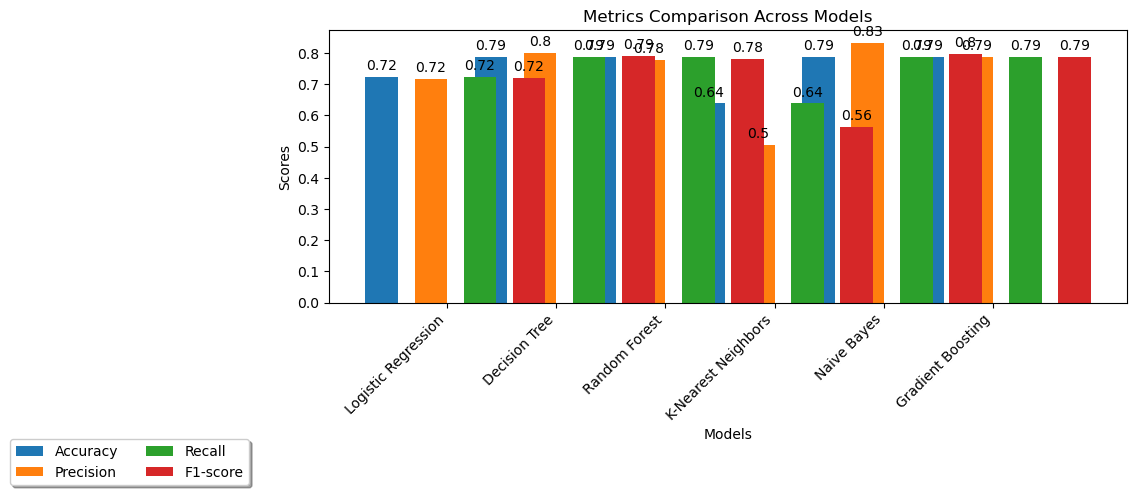

In [998]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have defined X_train_best, Y_train_best, X_test_best, Y_test_best previously

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Calculate metrics for each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_best, Y_train_best)
    
    # Predict on test set
    y_pred = model.predict(X_test_best)
    
    # Calculate metrics
    report = classification_report(Y_test_best, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    
    # Store metrics
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-score'].append(f1)

# Convert metrics to numpy arrays for plotting convenience
model_names = metrics['Model']
accuracy_scores = np.array(metrics['Accuracy'])
precision_scores = np.array(metrics['Precision'])
recall_scores = np.array(metrics['Recall'])
f1_scores = np.array(metrics['F1-score'])

# Plotting bar plot
x = np.arange(len(model_names))  # the label locations
width = 0.3  # the width of the bars
gap = 0.15  # the gap between groups of bars

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - 1.5*width - gap, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precision')
rects3 = ax.bar(x + 0.5*width + gap, recall_scores, width, label='Recall')
rects4 = ax.bar(x + 1.5*width + 2*gap, f1_scores, width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Metrics Comparison Across Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')

# Change legend position to upper right and place it outside the plot
ax.legend(loc='upper left', borderaxespad=0, bbox_to_anchor=(-0.4, -0.5), shadow=True, ncol=2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()


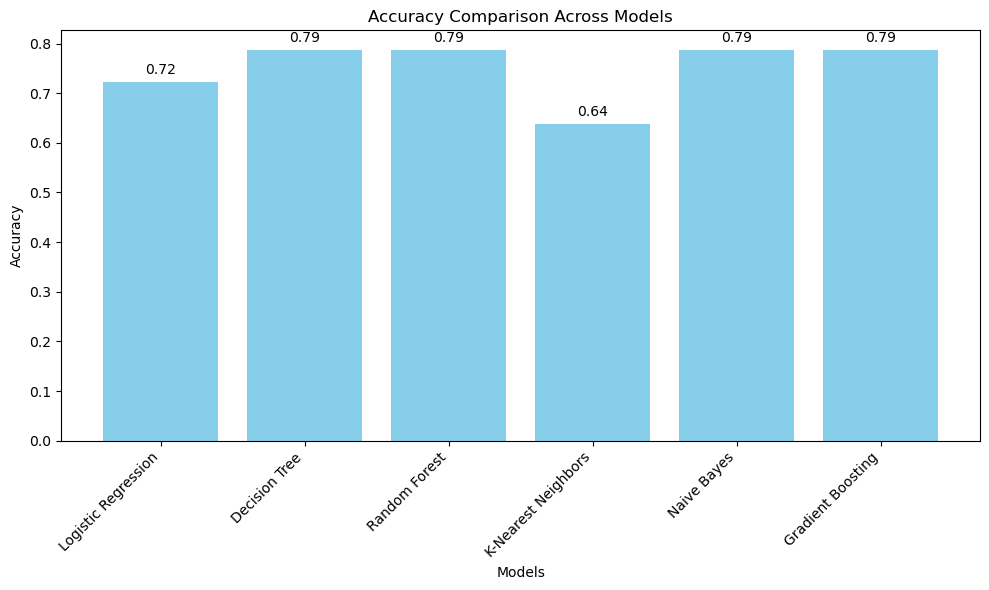

In [999]:
#only accuracy 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have defined X_train_best, Y_train_best, X_test_best, Y_test_best previously

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store accuracy scores
accuracy_scores = {}

# Calculate accuracy for each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_best, Y_train_best)
    
    # Predict on test set
    y_pred = model.predict(X_test_best)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test_best, y_pred)
    
    # Store accuracy score
    accuracy_scores[model_name] = accuracy

# Convert accuracy scores to numpy array for plotting convenience
model_names = list(accuracy_scores.keys())
accuracy_values = np.array(list(accuracy_scores.values()))

# Plotting bar plot for accuracy
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(model_names, accuracy_values, color='skyblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison Across Models')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the exact accuracy value on top of each bar
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [1000]:
#confusion matrix for all

In [1001]:
#naive bias confusion matrix
from sklearn.metrics import confusion_matrix
cm_nb=confusion_matrix(Y_test,nb_preds)


In [1002]:
cm_nb

array([[11,  2],
       [ 8, 26]], dtype=int64)

In [1003]:
#gradient boosting confusion matrix
cm_gb=confusion_matrix(Y_test_best,gb_preds)

In [1004]:
cm_gb

array([[ 8,  5],
       [ 5, 29]], dtype=int64)

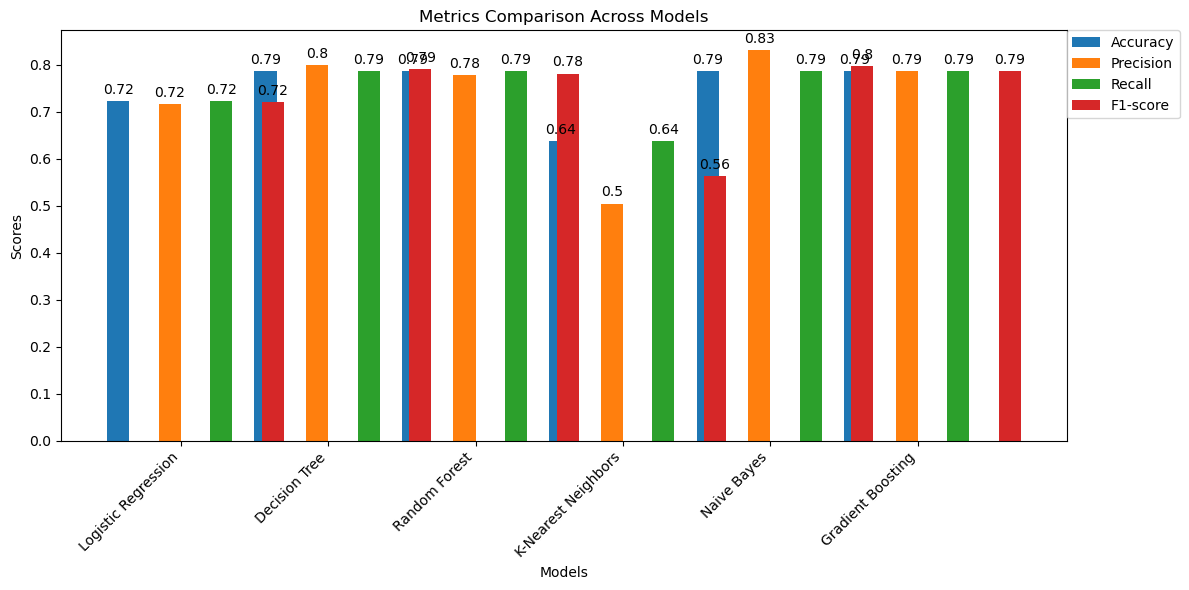

In [1005]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have defined X_train_best, Y_train_best, X_test_best, Y_test_best previously

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Calculate metrics for each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_best, Y_train_best)
    
    # Predict on test set
    y_pred = model.predict(X_test_best)
    
    # Calculate metrics
    report = classification_report(Y_test_best, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    
    # Store metrics
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-score'].append(f1)

# Convert metrics to numpy arrays for plotting convenience
model_names = metrics['Model']
accuracy_scores = np.array(metrics['Accuracy'])
precision_scores = np.array(metrics['Precision'])
recall_scores = np.array(metrics['Recall'])
f1_scores = np.array(metrics['F1-score'])

# Plotting bar plot
x = np.arange(len(model_names))  # the label locations
width = 0.15  # the width of the bars
gap = 0.2  # the gap between groups of bars

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - 1.5*width - gap, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precision')
rects3 = ax.bar(x + 0.5*width + gap, recall_scores, width, label='Recall')
rects4 = ax.bar(x + 1.5*width + 2*gap, f1_scores, width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Metrics Comparison Across Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')

# Change legend position to upper right and place it outside the plot
ax.legend(loc='upper left', borderaxespad=0, bbox_to_anchor=(1.0, 1.0))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()


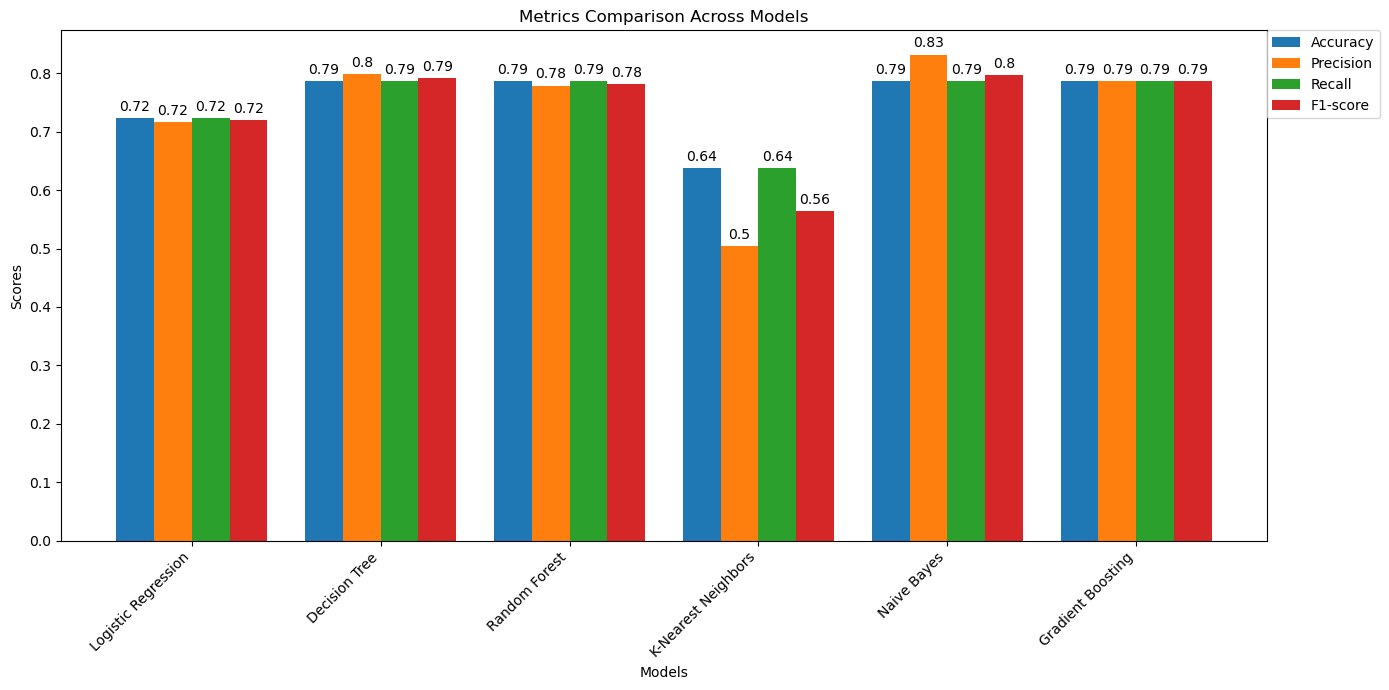

In [1006]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have defined X_train_best, Y_train_best, X_test_best, Y_test_best previously

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Calculate metrics for each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_best, Y_train_best)
    
    # Predict on test set
    y_pred = model.predict(X_test_best)
    
    # Calculate metrics
    report = classification_report(Y_test_best, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    
    # Store metrics
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-score'].append(f1)

# Convert metrics to numpy arrays for plotting convenience
model_names = metrics['Model']
accuracy_scores = np.array(metrics['Accuracy'])
precision_scores = np.array(metrics['Precision'])
recall_scores = np.array(metrics['Recall'])
f1_scores = np.array(metrics['F1-score'])

# Plotting bar plot
x = np.arange(len(model_names))  # the label locations
width = 0.2  # the width of the bars
gap = 0.3  # the gap between groups of bars

fig, ax = plt.subplots(figsize=(14, 7))

# Adjust positions for each bar group with gap
rects1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall_scores, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Metrics Comparison Across Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')

# Change legend position to upper right and place it outside the plot
ax.legend(loc='upper left', borderaxespad=0, bbox_to_anchor=(1.0, 1.0))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()
